In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import abel

In [2]:
#import data  gd
file_ = 'building_metadata.csv'
gd = pd.read_csv(file_, low_memory= False, encoding='utf8')
N, P = gd.shape
print('baris = ', N, ', Kolom(jumlah variabel)= ', P)
print("Tipe Variabel df = ", type(gd))
gd

baris =  1449 , Kolom(jumlah variabel)=  6
Tipe Variabel df =  <class 'pandas.core.frame.DataFrame'>


,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN
...,...,...,...,...,...,...
1444,15,1444,Entertainment/public assembly,19619,1914.0,NaN
1445,15,1445,Education,4298,NaN,NaN
1446,15,1446,Entertainment/public assembly,11265,1997.0,NaN
1447,15,1447,Lodging/residential,29775,2001.0,NaN


In [3]:
#import data en
file_ = 'train.csv'
en = pd.read_csv(file_, low_memory= False, encoding='utf8')
N, P = en.shape
print('baris = ', N, ', Kolom(jumlah variabel)= ', P)
print("Tipe Variabel df = ", type(gd))
en

baris =  20216100 , Kolom(jumlah variabel)=  4
Tipe Variabel df =  <class 'pandas.core.frame.DataFrame'>


,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.000
1,1,0,2016-01-01 00:00:00,0.000
2,2,0,2016-01-01 00:00:00,0.000
3,3,0,2016-01-01 00:00:00,0.000
4,4,0,2016-01-01 00:00:00,0.000
...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750
20216096,1445,0,2016-12-31 23:00:00,4.825
20216097,1446,0,2016-12-31 23:00:00,0.000
20216098,1447,0,2016-12-31 23:00:00,159.575


In [4]:
#import data cu
file_ = 'weather_test.csv'
cu = pd.read_csv(file_, low_memory= False, encoding='utf8')
N, P = cu.shape
print('baris = ', N, ', Kolom(jumlah variabel)= ', P)
print("Tipe Variabel df = ", type(cu))
cu

baris =  277243 , Kolom(jumlah variabel)=  9
Tipe Variabel df =  <class 'pandas.core.frame.DataFrame'>


,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2017-01-01 00:00:00,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
1,0,2017-01-01 01:00:00,17.8,2.0,12.8,0.0,1022.0,130.0,3.1
2,0,2017-01-01 02:00:00,16.1,0.0,12.8,0.0,1021.9,140.0,3.1
3,0,2017-01-01 03:00:00,17.2,0.0,13.3,0.0,1022.2,140.0,3.1
4,0,2017-01-01 04:00:00,16.7,2.0,13.3,0.0,1022.3,130.0,2.6
...,...,...,...,...,...,...,...,...,...
277238,15,2018-12-31 19:00:00,3.3,NaN,1.7,NaN,1018.3,150.0,7.7
277239,15,2018-12-31 20:00:00,2.8,NaN,1.1,NaN,1017.8,140.0,5.1
277240,15,2018-12-31 21:00:00,2.8,NaN,1.7,-1.0,1017.2,140.0,6.2
277241,15,2018-12-31 22:00:00,2.8,NaN,2.2,8.0,1016.1,140.0,5.1


# A. Gabungan Data GD CU

In [5]:
gdcu = pd.merge(gd, cu, on=['site_id'])
pd.merge(gd, cu)

,site_id,building_id,primary_use,square_feet,year_built,floor_count,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,Education,7432,2008.0,NaN,2017-01-01 00:00:00,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
1,0,0,Education,7432,2008.0,NaN,2017-01-01 01:00:00,17.8,2.0,12.8,0.0,1022.0,130.0,3.1
2,0,0,Education,7432,2008.0,NaN,2017-01-01 02:00:00,16.1,0.0,12.8,0.0,1021.9,140.0,3.1
3,0,0,Education,7432,2008.0,NaN,2017-01-01 03:00:00,17.2,0.0,13.3,0.0,1022.2,140.0,3.1
4,0,0,Education,7432,2008.0,NaN,2017-01-01 04:00:00,16.7,2.0,13.3,0.0,1022.3,130.0,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25273981,15,1448,Office,92271,2001.0,NaN,2018-12-31 19:00:00,3.3,NaN,1.7,NaN,1018.3,150.0,7.7
25273982,15,1448,Office,92271,2001.0,NaN,2018-12-31 20:00:00,2.8,NaN,1.1,NaN,1017.8,140.0,5.1
25273983,15,1448,Office,92271,2001.0,NaN,2018-12-31 21:00:00,2.8,NaN,1.7,-1.0,1017.2,140.0,6.2
25273984,15,1448,Office,92271,2001.0,NaN,2018-12-31 22:00:00,2.8,NaN,2.2,8.0,1016.1,140.0,5.1


Karena pada tugas kita tidak memerlukan timestamp dan site_id pada data cu, maka kita bisa hilangkan kedua kolom tersebut menggunakan drop.

In [6]:
gdcu.drop('timestamp', axis = 1, inplace = True)
gdcu

,site_id,building_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,Education,7432,2008.0,NaN,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
1,0,0,Education,7432,2008.0,NaN,17.8,2.0,12.8,0.0,1022.0,130.0,3.1
2,0,0,Education,7432,2008.0,NaN,16.1,0.0,12.8,0.0,1021.9,140.0,3.1
3,0,0,Education,7432,2008.0,NaN,17.2,0.0,13.3,0.0,1022.2,140.0,3.1
4,0,0,Education,7432,2008.0,NaN,16.7,2.0,13.3,0.0,1022.3,130.0,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25273981,15,1448,Office,92271,2001.0,NaN,3.3,NaN,1.7,NaN,1018.3,150.0,7.7
25273982,15,1448,Office,92271,2001.0,NaN,2.8,NaN,1.1,NaN,1017.8,140.0,5.1
25273983,15,1448,Office,92271,2001.0,NaN,2.8,NaN,1.7,-1.0,1017.2,140.0,6.2
25273984,15,1448,Office,92271,2001.0,NaN,2.8,NaN,2.2,8.0,1016.1,140.0,5.1


## Preprocessing 

**1. Missing Value gdcu**

In [7]:
gdcu.isnull().sum()

site_id                      0
building_id                  0
primary_use                  0
square_feet                  0
year_built            13531915
floor_count           19109158
air_temperature          10534
cloud_coverage        11755894
dew_temperature          26596
precip_depth_1_hr      5100401
sea_level_pressure     1983259
wind_direction         1315776
wind_speed               44874
dtype: int64

Dapat dilihat pada output di atas, bahwa terdapat MV pada kolom :
- year_built sebanyak 13531915
- floor_count sebanyak 19109158
- air_temperature sebanyak 10534
- cloud_coverage sebanyak 11755894
- dew_temperature sebanyak 26596
- precip_depth_1_hr sebanyak 5100401
- sea_level_pressure sebanyak 1983259
- wind_direction sebanyak 1315776
- wind_speed sebanyak 44874.

Karena pada floor_count terdapat lebih dari 50% Missing Value maka kita hilangkan saja kolom floor_count tersebut menggunakan drop dan untuk Missing Value yang lain bisa kita handle dengan menggantikan nilai MV dengan 0 supaya tidak terdapat MV lagi pada data.

In [8]:
gdcu.drop('floor_count', axis = 1,inplace = True)#untuk menghilangkan
gdcu.fillna(0, inplace = True) #untuk mengatasi MV lainnya 
gdcu.isnull().sum()

site_id               0
building_id           0
primary_use           0
square_feet           0
year_built            0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
dtype: int64

Dengan mengisi Missing Value dengan 0 dan mendrop floor_count maka Missing Value sudah teratasi

**2. Duplicated Data**

In [9]:
print(gdcu.shape)
gdcu.duplicated().sum() #melihat jumlah duplicated data pada gdcu

(25273986, 12)


441152

In [10]:
gdcu.drop_duplicates(inplace = True)
print(gdcu.shape)
gdcu.duplicated().sum()

(24832834, 12)


0

Karena missing value dan duplicated data sudah tertasi maka kita bisa melanjutkan ke pengecekan putlier

**3. Outlier**

In [11]:
#outlier pada kolom wind_speed
# Deteksi Outlier menggunakan nilai IQR

Q1 = gdcu.wind_speed.quantile(0.25)
Q3 = gdcu.wind_speed.quantile(0.75)
IQR = Q3 - Q1
print('Q1 =', Q1)
print('Q2 =', Q3)
print('IQR =', IQR)

Q1 = 2.1
Q2 = 4.6
IQR = 2.4999999999999996


In [12]:
# Menentukan batas bawah dan batas atas

batasBawah = Q1 - (1.5 * IQR)
batasAtas = Q3 + (1.5 * IQR)
print('batas bawah =', batasBawah)
print('batas atas =', batasAtas)

batas bawah = -1.649999999999999
batas atas = 8.349999999999998


Text(0.5, 1.0, 'Wind Speed Boxplot')

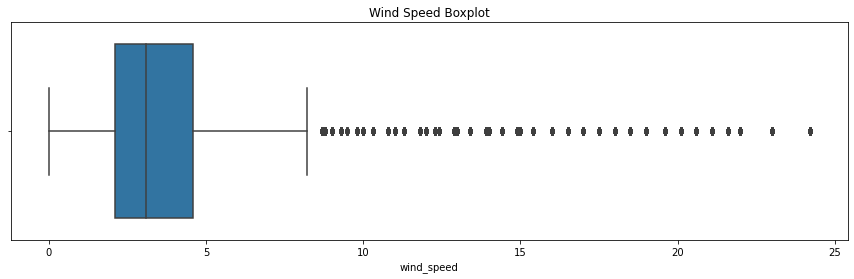

In [13]:
#Mengecek outlier menggunakan visualisasi boxplot
fig, ax = plt.subplots(figsize = (15,4))
sns.boxplot(x = gdcu.wind_speed).set_title('Wind Speed Boxplot')

In [14]:
# Deteksi Outlier menggunakan nilai IQR
Q1 = gdcu.wind_speed.quantile(0.25)
Q3 = gdcu.wind_speed.quantile(0.75)
IQR = Q3 - Q1
print('Q1 =', Q1)
print('Q2 =', Q3)
print('IQR =', IQR)

Q1 = 2.1
Q2 = 4.6
IQR = 2.4999999999999996


In [15]:
# Menentukan batas bawah dan batas atas

batasBawah = Q1 - (1.5 * IQR)
batasAtas = Q3 + (1.5 * IQR)
print('batas bawah =', batasBawah)
print('batas atas =', batasAtas)

batas bawah = -1.649999999999999
batas atas = 8.349999999999998


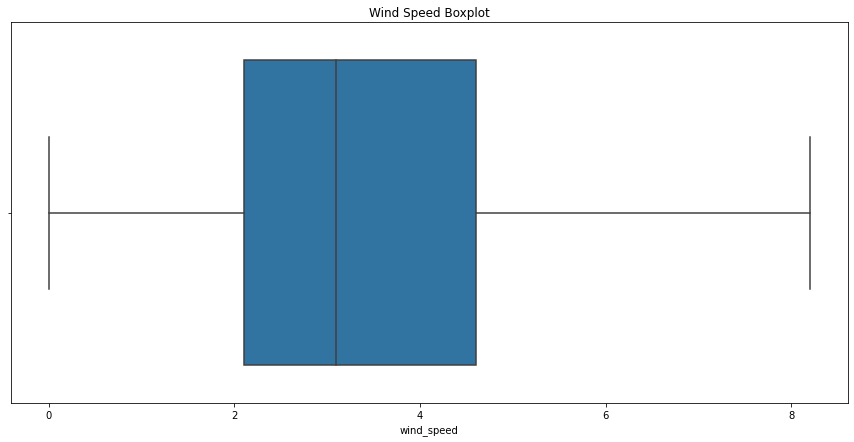

In [16]:
# handle outlier dengan replace menggantinya dengan nilai mean

gdcu['wind_speed'] = gdcu.wind_speed.mask(gdcu.wind_speed > batasAtas, gdcu.wind_speed.mean())
gdcu['wind_speed'] = gdcu.wind_speed.mask(gdcu.wind_speed < batasBawah, gdcu.wind_speed.mean())
fig, ax = plt.subplots(figsize = (15,7))
fig = sns.boxplot(x = gdcu.wind_speed).set_title('Wind Speed Boxplot')

Text(0.5, 1.0, 'Wind Direction')

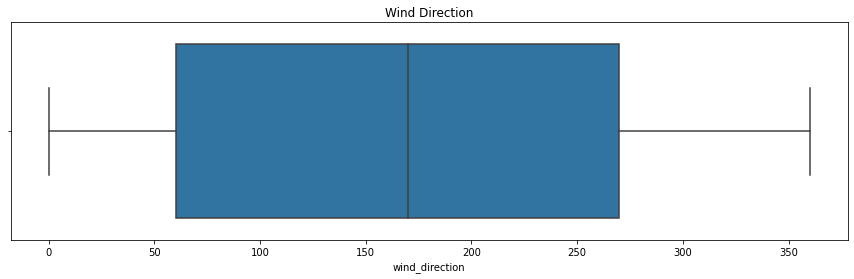

In [17]:
#Cek oulier kolom Wind Direction
fig, ax = plt.subplots(figsize = (15,4))
sns.boxplot(x = gdcu.wind_direction).set_title('Wind Direction')

Text(0.5, 1.0, 'Sea Level Pressure')

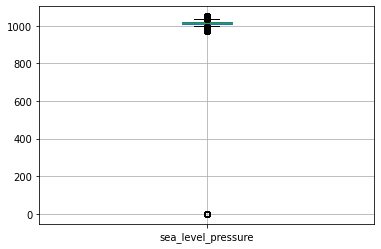

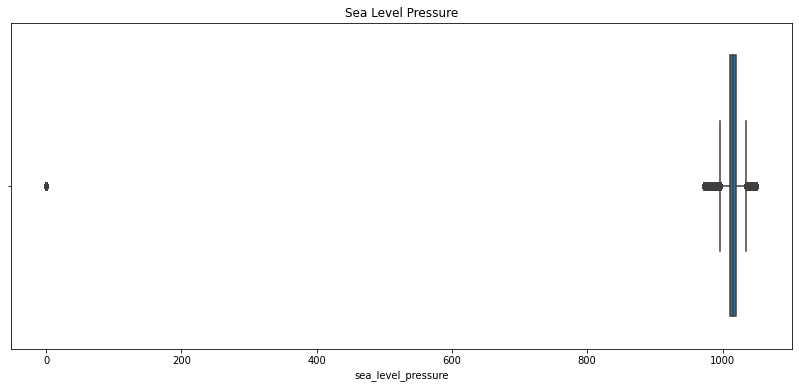

In [18]:
#Cek outlier kolom sea_level_pressure
gdcu.boxplot(column = 'sea_level_pressure')
fig, ax = plt.subplots(figsize = (14,6))
sns.boxplot(x = gdcu.sea_level_pressure).set_title('Sea Level Pressure')

In [19]:
# Deteksi Outlier menggunakan nilai IQR

Q1 = gdcu.sea_level_pressure.quantile(0.25)
Q3 = gdcu.sea_level_pressure.quantile(0.75)
IQR = Q3 - Q1
print('Q1 =', Q1)
print('Q2 =', Q3)
print('IQR =', IQR)

Q1 = 1010.7
Q2 = 1020.4
IQR = 9.699999999999932


In [20]:
# Menentukan batas bawah dan batas atas

batasBawah = Q1 - (1.5 * IQR)
batasAtas = Q3 + (1.5 * IQR)
print('batas bawah =', batasBawah)
print('batas atas =', batasAtas)

batas bawah = 996.1500000000001
batas atas = 1034.9499999999998


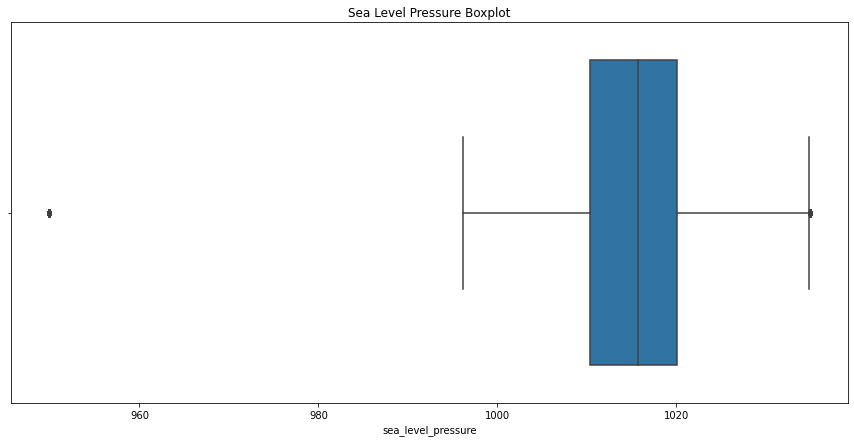

In [21]:
# handle outlier dengan replace menggantinya dengan nilai mean

gdcu['sea_level_pressure'] = gdcu.sea_level_pressure.mask(gdcu.sea_level_pressure > batasAtas, gdcu.sea_level_pressure.mean())
gdcu['sea_level_pressure'] = gdcu.sea_level_pressure.mask(gdcu.sea_level_pressure < batasBawah, gdcu.sea_level_pressure.mean())
fig, ax = plt.subplots(figsize = (15,7))
fig = sns.boxplot(x = gdcu.sea_level_pressure).set_title('Sea Level Pressure Boxplot')

In [22]:
gdcu

,site_id,building_id,primary_use,square_feet,year_built,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,Education,7432,2008.0,17.8,4.0,11.7,0.0,1021.4,100.0,3.6
1,0,0,Education,7432,2008.0,17.8,2.0,12.8,0.0,1022.0,130.0,3.1
2,0,0,Education,7432,2008.0,16.1,0.0,12.8,0.0,1021.9,140.0,3.1
3,0,0,Education,7432,2008.0,17.2,0.0,13.3,0.0,1022.2,140.0,3.1
4,0,0,Education,7432,2008.0,16.7,2.0,13.3,0.0,1022.3,130.0,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...
25273981,15,1448,Office,92271,2001.0,3.3,0.0,1.7,0.0,1018.3,150.0,7.7
25273982,15,1448,Office,92271,2001.0,2.8,0.0,1.1,0.0,1017.8,140.0,5.1
25273983,15,1448,Office,92271,2001.0,2.8,0.0,1.7,-1.0,1017.2,140.0,6.2
25273984,15,1448,Office,92271,2001.0,2.8,0.0,2.2,8.0,1016.1,140.0,5.1


Text(0.5, 1.0, 'Precip Depth 1 Hour')

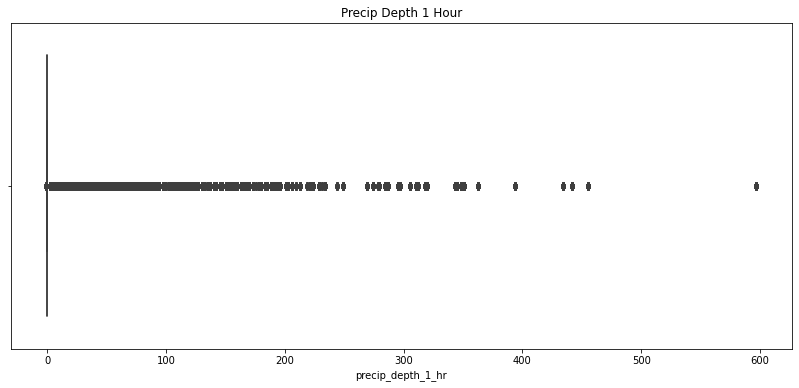

In [23]:
#cek outlier pada kolom precip_depth_1_hr
fig, ax = plt.subplots(figsize = (14,6))
sns.boxplot(x = gdcu.precip_depth_1_hr).set_title('Precip Depth 1 Hour')

In [24]:
# Deteksi Outlier menggunakan nilai IQR

Q1 = gdcu.precip_depth_1_hr.quantile(0.25)
Q3 = gdcu.precip_depth_1_hr.quantile(0.75)
IQR = Q3 - Q1
print('Q1 =', Q1)
print('Q2 =', Q3)
print('IQR =', IQR)

Q1 = 0.0
Q2 = 0.0
IQR = 0.0


In [25]:
# Menentukan batas bawah dan batas atas

batasBawah = Q1 - (1.5 * IQR)
batasAtas = Q3 + (1.5 * IQR)
print('batas bawah =', batasBawah)
print('batas atas =', batasAtas)

batas bawah = 0.0
batas atas = 0.0


Text(0.5, 1.0, 'Dew Temperature')

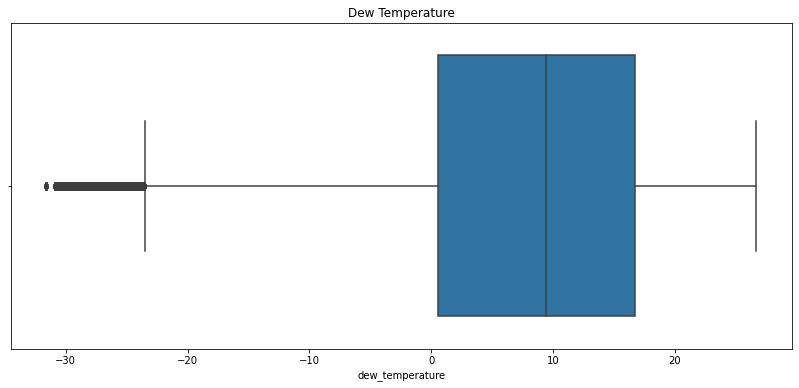

In [26]:
#Cek outlier kolom dew_temperature
fig, ax = plt.subplots(figsize = (14,6))
sns.boxplot(x = gdcu.dew_temperature).set_title('Dew Temperature')

In [27]:
# Deteksi Outlier menggunakan nilai IQR

Q1 = gdcu.dew_temperature.quantile(0.25)
Q3 = gdcu.dew_temperature.quantile(0.75)
IQR = Q3 - Q1
print('Q1 =', Q1)
print('Q2 =', Q3)
print('IQR =', IQR)

Q1 = 0.6
Q2 = 16.7
IQR = 16.099999999999998


In [28]:
# Menentukan batas bawah dan batas atas

batasBawah = Q1 - (1.5 * IQR)
batasAtas = Q3 + (1.5 * IQR)
print('batas bawah =', batasBawah)
print('batas atas =', batasAtas)

batas bawah = -23.549999999999997
batas atas = 40.849999999999994


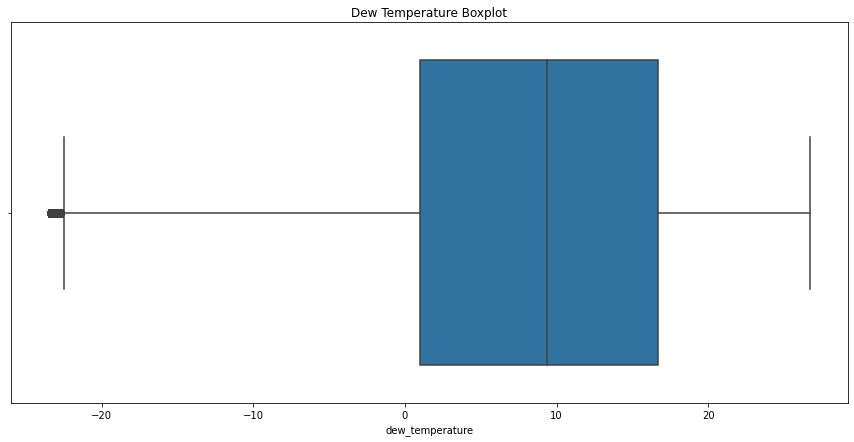

In [29]:
# handle outlier dengan replace menggantinya dengan nilai mean

gdcu['dew_temperature'] = gdcu.dew_temperature.mask(gdcu.dew_temperature > batasAtas, gdcu.dew_temperature.mean())
gdcu['dew_temperature'] = gdcu.dew_temperature.mask(gdcu.dew_temperature < batasBawah, gdcu.dew_temperature.mean())
fig, ax = plt.subplots(figsize = (15,7))
fig = sns.boxplot(x = gdcu.dew_temperature).set_title('Dew Temperature Boxplot')

Text(0.5, 1.0, 'Cloud Coverage')

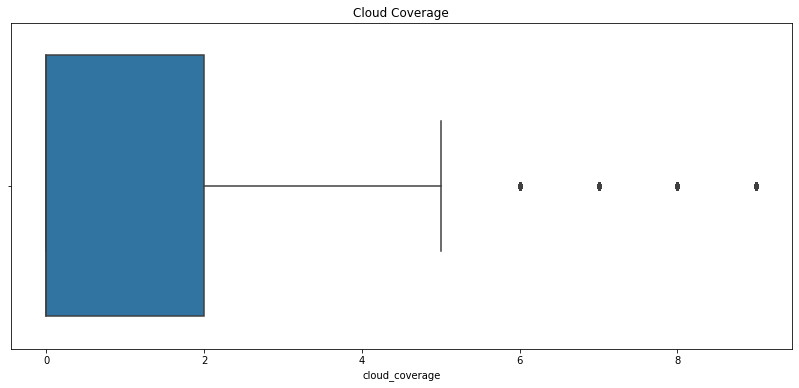

In [30]:
#Cek outlier cloud coverage
fig, ax = plt.subplots(figsize = (14,6))
sns.boxplot(x = gdcu.cloud_coverage).set_title('Cloud Coverage')

In [31]:
# Deteksi Outlier menggunakan nilai IQR

Q1 = gdcu.cloud_coverage.quantile(0.25)
Q3 = gdcu.cloud_coverage.quantile(0.75)
IQR = Q3 - Q1
print('Q1 =', Q1)
print('Q2 =', Q3)
print('IQR =', IQR)

Q1 = 0.0
Q2 = 2.0
IQR = 2.0


In [32]:
# Menentukan batas bawah dan batas atas

batasBawah = Q1 - (1.5 * IQR)
batasAtas = Q3 + (1.5 * IQR)
print('batas bawah =', batasBawah)
print('batas atas =', batasAtas)

batas bawah = -3.0
batas atas = 5.0


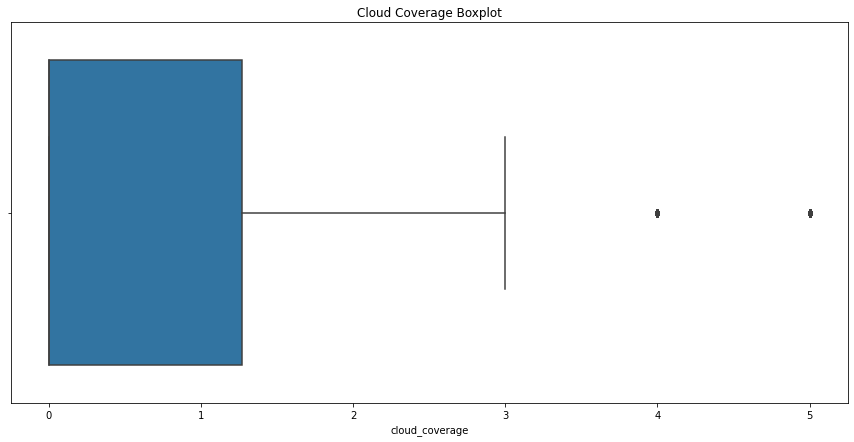

In [33]:
# handle outlier dengan replace menggantinya dengan nilai mean

gdcu['cloud_coverage'] = gdcu.cloud_coverage.mask(gdcu.cloud_coverage > batasAtas, gdcu.cloud_coverage.mean())
gdcu['cloud_coverage'] = gdcu.cloud_coverage.mask(gdcu.cloud_coverage < batasBawah, gdcu.cloud_coverage.mean())
fig, ax = plt.subplots(figsize = (15,7))
fig = sns.boxplot(x = gdcu.cloud_coverage).set_title('Cloud Coverage Boxplot')

In [34]:
# Deteksi Outlier menggunakan nilai IQR
Q1 = gdcu.cloud_coverage.quantile(0.25)
Q3 = gdcu.cloud_coverage.quantile(0.75)
IQR = Q3 - Q1
print('Q1 =', Q1)
print('Q2 =', Q3)
print('IQR =', IQR)

Q1 = 0.0
Q2 = 1.2700347451281637
IQR = 1.2700347451281637


In [35]:
# Menentukan batas bawah dan batas atas

batasBawah = Q1 - (1.5 * IQR)
batasAtas = Q3 + (1.5 * IQR)
print('batas bawah =', batasBawah)
print('batas atas =', batasAtas)

batas bawah = -1.9050521176922457
batas atas = 3.175086862820409


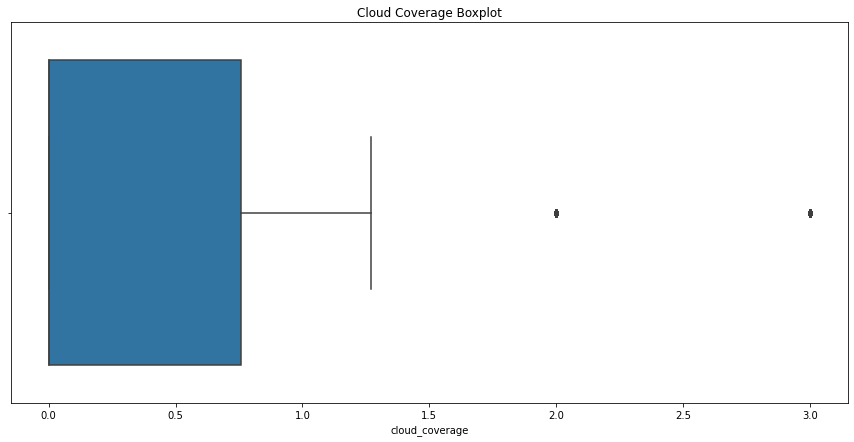

In [36]:
# handle outlier dengan replace menggantinya dengan nilai mean

gdcu['cloud_coverage'] = gdcu.cloud_coverage.mask(gdcu.cloud_coverage > batasAtas, gdcu.cloud_coverage.mean())
gdcu['cloud_coverage'] = gdcu.cloud_coverage.mask(gdcu.cloud_coverage < batasBawah, gdcu.cloud_coverage.mean())
fig, ax = plt.subplots(figsize = (15,7))
fig = sns.boxplot(x = gdcu.cloud_coverage).set_title('Cloud Coverage Boxplot')

Text(0.5, 1.0, 'Air Temperature')

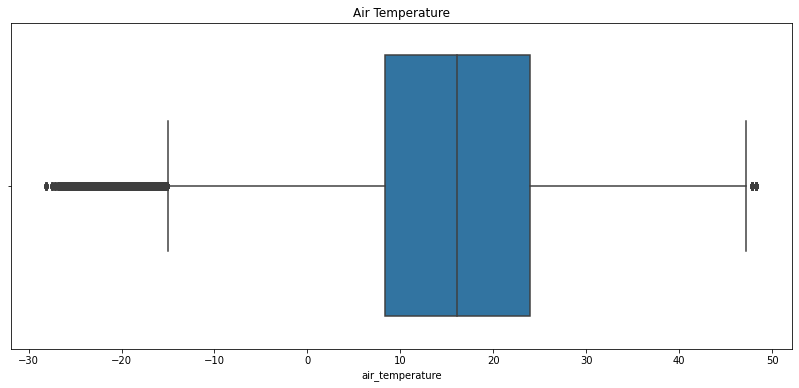

In [37]:
#Outlier pada aie_temperature
fig, ax = plt.subplots(figsize = (14,6))
sns.boxplot(x = gdcu.air_temperature).set_title('Air Temperature')

In [38]:
Q1 = gdcu.air_temperature.quantile(0.25)
Q3 = gdcu.air_temperature.quantile(0.75)
IQR = Q3 - Q1
print('Q1 =', Q1)
print('Q2 =', Q3)
print('IQR =', IQR)

Q1 = 8.3
Q2 = 23.9
IQR = 15.599999999999998


In [39]:
# Menentukan batas bawah dan batas atas

batasBawah = Q1 - (1.5 * IQR)
batasAtas = Q3 + (1.5 * IQR)
print('batas bawah =', batasBawah)
print('batas atas =', batasAtas)

batas bawah = -15.099999999999998
batas atas = 47.3


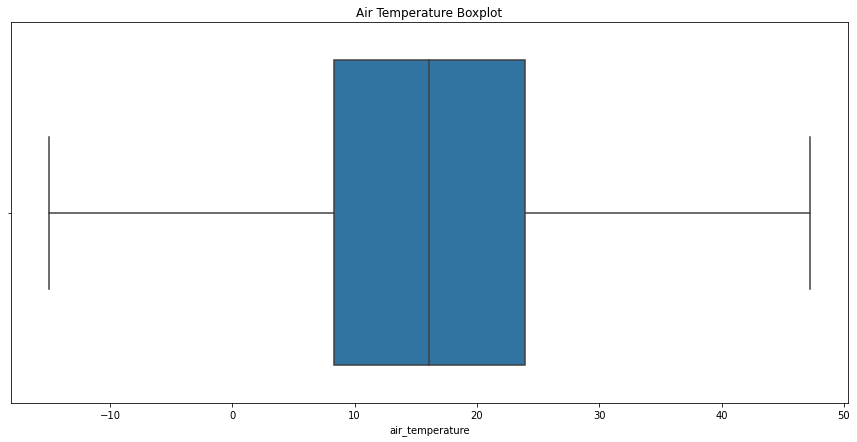

In [40]:
# handle outlier dengan replace menggantinya dengan nilai mean

gdcu['air_temperature'] = gdcu.air_temperature.mask(gdcu.air_temperature > batasAtas, gdcu.cloud_coverage.mean())
gdcu['air_temperature'] = gdcu.air_temperature.mask(gdcu.air_temperature < batasBawah, gdcu.cloud_coverage.mean())
fig, ax = plt.subplots(figsize = (15,7))
fig = sns.boxplot(x = gdcu.air_temperature).set_title('Air Temperature Boxplot')

**4. Statistika Deskriptif**

In [41]:
gdcu

,site_id,building_id,primary_use,square_feet,year_built,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,Education,7432,2008.0,17.8,0.756098,11.7,0.0,1021.4,100.0,3.6
1,0,0,Education,7432,2008.0,17.8,2.000000,12.8,0.0,1022.0,130.0,3.1
2,0,0,Education,7432,2008.0,16.1,0.000000,12.8,0.0,1021.9,140.0,3.1
3,0,0,Education,7432,2008.0,17.2,0.000000,13.3,0.0,1022.2,140.0,3.1
4,0,0,Education,7432,2008.0,16.7,2.000000,13.3,0.0,1022.3,130.0,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...
25273981,15,1448,Office,92271,2001.0,3.3,0.000000,1.7,0.0,1018.3,150.0,7.7
25273982,15,1448,Office,92271,2001.0,2.8,0.000000,1.1,0.0,1017.8,140.0,5.1
25273983,15,1448,Office,92271,2001.0,2.8,0.000000,1.7,-1.0,1017.2,140.0,6.2
25273984,15,1448,Office,92271,2001.0,2.8,0.000000,2.2,8.0,1016.1,140.0,5.1


In [42]:
gdcu.describe(include='all')

,site_id,building_id,primary_use,square_feet,year_built,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,2.483283e+07,2.483283e+07,24832834,2.483283e+07,2.483283e+07,2.483283e+07,2.483283e+07,2.483283e+07,2.483283e+07,2.483283e+07,2.483283e+07,2.483283e+07
unique,NaN,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,9325269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.966810e+00,7.229845e+02,NaN,9.266771e+04,8.996896e+02,1.569574e+01,4.393200e-01,8.244136e+00,7.464318e-01,1.010793e+03,1.671776e+02,3.341432e+00
std,5.031435e+00,4.212210e+02,NaN,1.111421e+05,9.806868e+02,1.052252e+01,7.188400e-01,1.022507e+01,7.782012e+00,1.957157e+01,1.161938e+02,1.965248e+00
min,0.000000e+00,0.000000e+00,NaN,2.830000e+02,0.000000e+00,-1.500000e+01,0.000000e+00,-2.350000e+01,-1.000000e+00,9.498684e+02,0.000000e+00,0.000000e+00
25%,3.000000e+00,3.550000e+02,NaN,2.311200e+04,0.000000e+00,8.300000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.010300e+03,6.000000e+01,2.100000e+00
50%,5.000000e+00,7.280000e+02,NaN,5.830700e+04,0.000000e+00,1.610000e+01,0.000000e+00,9.400000e+00,0.000000e+00,1.015700e+03,1.700000e+02,3.100000e+00
75%,1.300000e+01,1.091000e+03,NaN,1.161210e+05,1.967000e+03,2.390000e+01,7.560978e-01,1.670000e+01,0.000000e+00,1.020100e+03,2.700000e+02,4.600000e+00


**5. Visualisasi**

In [43]:
CT = pd.crosstab(index=gdcu["site_id"], columns=gdcu["primary_use"])
CT

primary_use,Education,Entertainment/public assembly,Food sales and service,Healthcare,Lodging/residential,Manufacturing/industrial,Office,Other,Parking,Public services,Religious worship,Retail,Services,Technology/science,Utility,Warehouse/storage
site_id,,,,,,,,,,,,,,,,
0,523290,87215,0,0,470961,0,418632,87215,139544,0,0,104658,0,0,0,0
1,380270,17285,0,0,172850,0,276560,0,0,34570,0,0,0,0,0,0
2,1068293,367773,35026,17513,210156,0,420312,0,52539,105078,17513,17513,0,0,17513,35026
3,1610644,770308,0,105042,192577,0,402661,70028,17507,1505602,17507,17507,0,0,0,87535
4,1151304,156996,0,0,69776,0,0,0,52332,104664,0,0,0,34888,17444,0
5,641459,235638,0,13091,13091,39273,144001,13091,0,65455,0,0,0,0,0,0
6,260760,69536,0,0,208608,0,191224,0,0,34768,0,0,0,0,0,0
7,248565,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,418632,0,0,0,0,122101,156987,0,488404,0,0,0,0,0,34886


In [44]:
CT_dew = pd.crosstab(index=gdcu["dew_temperature"], columns=gdcu["air_temperature"])
CT_dew

air_temperature,-15.0,-14.9,-14.8,-14.7,-14.6,-14.5,-14.4,-14.3,-14.2,-14.1,...,42.2,42.8,43.3,43.9,44.4,45.0,45.6,46.1,46.7,47.2
dew_temperature,,,,,,,,,,,,,,,,,,,,,
-23.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-23.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-23.3,102,0,0,0,0,20,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-23.2,0,0,0,0,0,0,0,20,0,0,...,0,0,0,0,0,0,0,0,0,0
-23.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24.6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25.6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


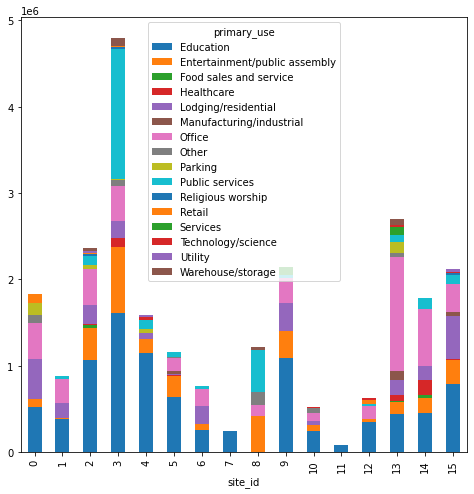

In [45]:
p = CT.plot(kind="bar", figsize=(8,8), stacked=True)

Berdasarkan visualisasi data di atas dengan mengambil variabel site_id (id lokasi) dan primary_use (Peruntukan Gedung), kita dapat mengetahui jika banyak perbedaan di setiap blok atau id lokasinya. Terlihat jika Education lebih mendominasi pada setiap blok 0, 1, hinggal blok 15. Kemudian, terlihat juga jika pada id atau blok 11, gedung hanya diperuntukan untuk Education, tidak dengan peruntukkan lainnya.

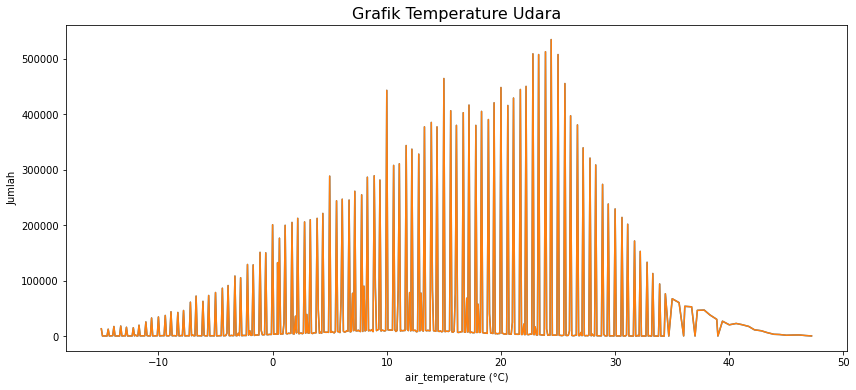

In [46]:
fig, axes = plt.subplots(1,1,figsize=(14, 6))
gdcu['air_temperature'].value_counts(dropna=False).sort_index().plot(ax=axes).set_xlabel('air_temperature (°C)');
gdcu['air_temperature'].value_counts(dropna=False).sort_index().plot(ax=axes).set_ylabel('Jumlah');
axes.set_title('Grafik Temperature Udara', fontsize=16);

Pada Grafik Temperature Udara di atas memperlihatkan jika frekuensi suhu antara 20 - 30 paling tinggi jumlahnya pada data gdcu (joint data Gedung dengan data cuaca). Hal ini berarti gedung-gedung yang dibangun sebagian besar berada di suhu antara 20 sampai 30 derajat.

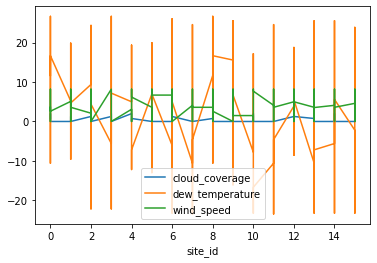

In [47]:
gdcu.plot(x = 'site_id', y = ['cloud_coverage', 'dew_temperature', 'wind_speed'])
plt.show()

# B. Gabungan GD dan EN 

In [49]:
gden = pd.merge(gd, en)
gden

,site_id,building_id,primary_use,square_feet,year_built,floor_count,meter,timestamp,meter_reading
0,0,0,Education,7432,2008.0,NaN,0,2016-01-01 00:00:00,0.000
1,0,0,Education,7432,2008.0,NaN,0,2016-01-01 01:00:00,0.000
2,0,0,Education,7432,2008.0,NaN,0,2016-01-01 02:00:00,0.000
3,0,0,Education,7432,2008.0,NaN,0,2016-01-01 03:00:00,0.000
4,0,0,Education,7432,2008.0,NaN,0,2016-01-01 04:00:00,0.000
...,...,...,...,...,...,...,...,...,...
20216095,15,1448,Office,92271,2001.0,NaN,0,2016-12-31 19:00:00,3.400
20216096,15,1448,Office,92271,2001.0,NaN,0,2016-12-31 20:00:00,2.700
20216097,15,1448,Office,92271,2001.0,NaN,0,2016-12-31 21:00:00,3.050
20216098,15,1448,Office,92271,2001.0,NaN,0,2016-12-31 22:00:00,3.125


**1. Missing Value gd_en**

In [50]:
gden.isnull().sum()

site_id                 0
building_id             0
primary_use             0
square_feet             0
year_built       12127645
floor_count      16709167
meter                   0
timestamp               0
meter_reading           0
dtype: int64

Karena pada kolom floor_count terdapat lebih ari 50% Missing Value maka kita bisa hilangkan tabel itu dengan menggunakan drop dan untuk kolom year_built bisa kita atasi dengan mengisi 0

In [51]:
gden.drop('floor_count', axis = 1, inplace = True) #untuk menghilangkan tabel floor_count
gden.fillna(0, inplace = True)

In [52]:
gden.isnull().sum()

site_id          0
building_id      0
primary_use      0
square_feet      0
year_built       0
meter            0
timestamp        0
meter_reading    0
dtype: int64

**2. Duplicated Data**

In [53]:
print(gden.shape)
gden.duplicated().sum()

(20216100, 8)


0

**3. Outlier**

a. Outlier pada kolom square_feet

Text(0.5, 1.0, 'Square Feet')

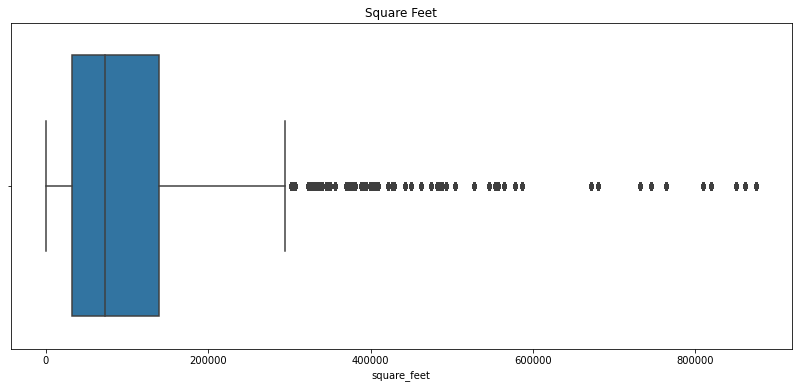

In [54]:
fig, ax = plt.subplots(figsize = (14,6))
sns.boxplot(x = gden.square_feet).set_title('Square Feet')

In [55]:
# Deteksi Outlier menggunakan nilai IQR

Q1 = gden.square_feet.quantile(0.25)
Q3 = gden.square_feet.quantile(0.75)
IQR = Q3 - Q1
print('Q1 =', Q1)
print('Q2 =', Q3)
print('IQR =', IQR)

Q1 = 32527.0
Q2 = 139113.0
IQR = 106586.0


In [56]:
# Menentukan batas bawah dan batas atas

batasBawah = Q1 - (1.5 * IQR)
batasAtas = Q3 + (1.5 * IQR)
print('batas bawah =', batasBawah)
print('batas atas =', batasAtas)

batas bawah = -127352.0
batas atas = 298992.0


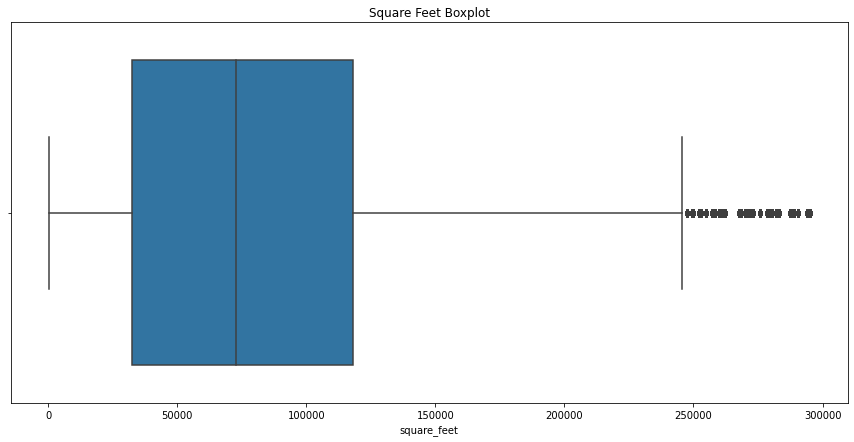

In [57]:
# handle outlier dengan replace menggantinya dengan nilai mean

gden['square_feet'] = gden.square_feet.mask(gden.square_feet > batasAtas, gden.square_feet.mean())
gden['square_feet'] = gden.square_feet.mask(gden.square_feet < batasBawah, gden.square_feet.mean())
fig, ax = plt.subplots(figsize = (15,7))
fig = sns.boxplot(x = gden.square_feet).set_title('Square Feet Boxplot')

b. Outlier pada meter_reading

Text(0.5, 1.0, 'Meter Reading')

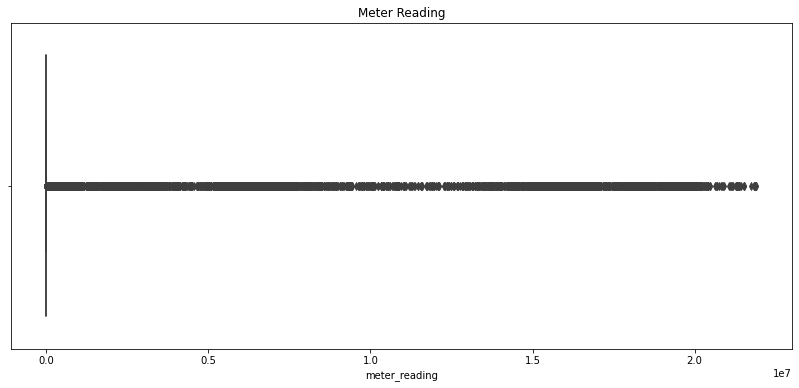

In [58]:
fig, ax = plt.subplots(figsize = (14,6))
sns.boxplot(x = gden.meter_reading).set_title('Meter Reading')

In [59]:
# Deteksi Outlier menggunakan nilai IQR

Q1 = gden.meter_reading.quantile(0.25)
Q3 = gden.meter_reading.quantile(0.75)
IQR = Q3 - Q1
print('Q1 =', Q1)
print('Q2 =', Q3)
print('IQR =', IQR)

Q1 = 18.3
Q2 = 267.98400000000004
IQR = 249.68400000000003


In [60]:
# Menentukan batas bawah dan batas atas

batasBawah = Q1 - (1.5 * IQR)
batasAtas = Q3 + (1.5 * IQR)
print('batas bawah =', batasBawah)
print('batas atas =', batasAtas)

batas bawah = -356.22600000000006
batas atas = 642.5100000000001


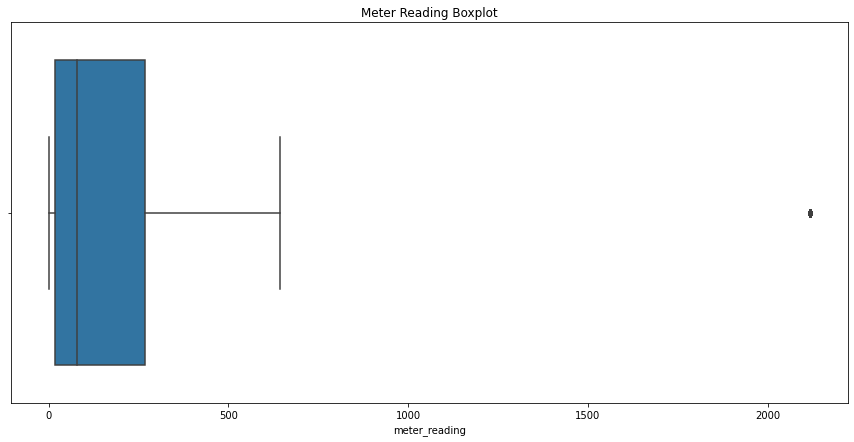

In [61]:
# handle outlier dengan replace menggantinya dengan nilai mean

gden['meter_reading'] = gden.meter_reading.mask(gden.meter_reading > batasAtas, gden.meter_reading.mean())
gden['meter_reading'] = gden.meter_reading.mask(gden.meter_reading < batasBawah, gden.meter_reading.mean())
fig, ax = plt.subplots(figsize = (15,7))
fig = sns.boxplot(x = gden.meter_reading).set_title('Meter Reading Boxplot')

**4. Statistike Deskriptif**

In [62]:
gden.describe()

,site_id,building_id,square_feet,year_built,meter,meter_reading
count,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07
mean,7.992232e+00,7.992780e+02,8.725234e+04,7.875069e+02,6.624412e-01,3.624457e+02
std,5.099060e+00,4.269133e+02,6.824965e+04,9.644841e+02,9.309921e-01,6.692184e+02
min,0.000000e+00,0.000000e+00,2.830000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,3.930000e+02,3.252700e+04,0.000000e+00,0.000000e+00,1.830000e+01
50%,9.000000e+00,8.950000e+02,7.270900e+04,0.000000e+00,0.000000e+00,7.877500e+01
75%,1.300000e+01,1.179000e+03,1.182310e+05,1.964000e+03,1.000000e+00,2.679840e+02
max,1.500000e+01,1.448000e+03,2.950000e+05,2.017000e+03,3.000000e+00,2.117121e+03


In [63]:
# Statistika Sederhana dari data "Numerik"-nya
gden.describe(include='all')

,site_id,building_id,primary_use,square_feet,year_built,meter,timestamp,meter_reading
count,2.021610e+07,2.021610e+07,20216100,2.021610e+07,2.021610e+07,2.021610e+07,20216100,2.021610e+07
unique,NaN,NaN,16,NaN,NaN,NaN,8784,NaN
top,NaN,NaN,Education,NaN,NaN,NaN,2016-12-27 22:00:00,NaN
freq,NaN,NaN,8165504,NaN,NaN,NaN,2370,NaN
mean,7.992232e+00,7.992780e+02,NaN,8.725234e+04,7.875069e+02,6.624412e-01,NaN,3.624457e+02
std,5.099060e+00,4.269133e+02,NaN,6.824965e+04,9.644841e+02,9.309921e-01,NaN,6.692184e+02
min,0.000000e+00,0.000000e+00,NaN,2.830000e+02,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,3.000000e+00,3.930000e+02,NaN,3.252700e+04,0.000000e+00,0.000000e+00,NaN,1.830000e+01
50%,9.000000e+00,8.950000e+02,NaN,7.270900e+04,0.000000e+00,0.000000e+00,NaN,7.877500e+01
75%,1.300000e+01,1.179000e+03,NaN,1.182310e+05,1.964000e+03,1.000000e+00,NaN,2.679840e+02


**5. Visualisasi**

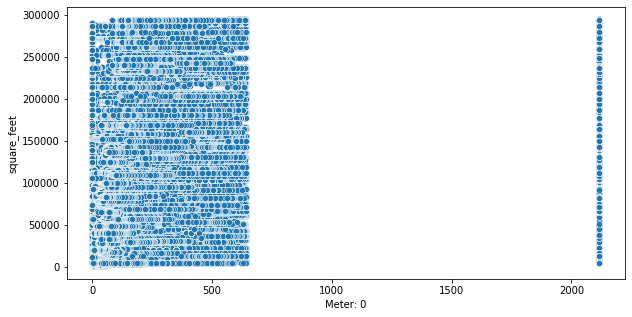

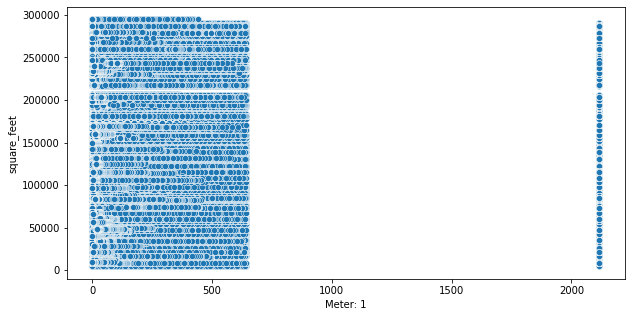

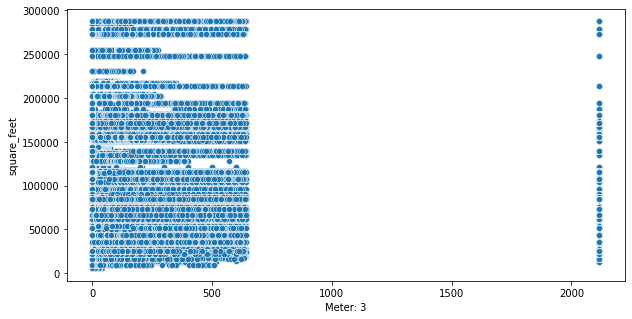

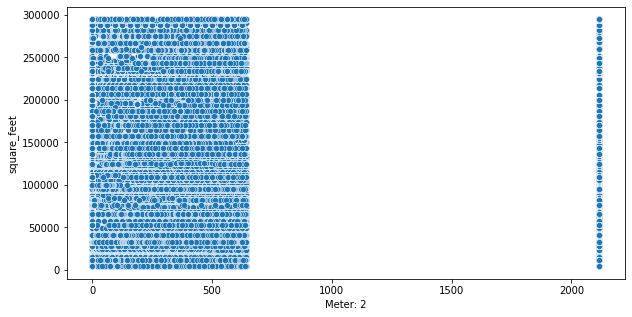

In [64]:
meter_arr = gden['meter'].unique()
for meter in meter_arr:
    mask = gden['meter'] == meter
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data = gden[mask], x = 'meter_reading', y = 'square_feet')
    plt.xlabel('Meter: {}'.format(meter))
    plt.show()

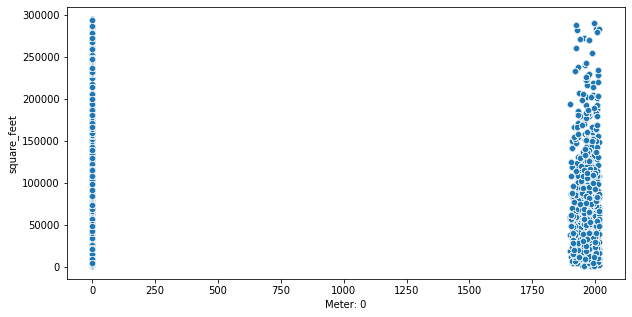

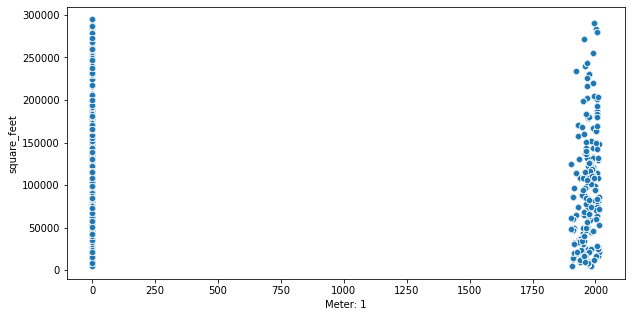

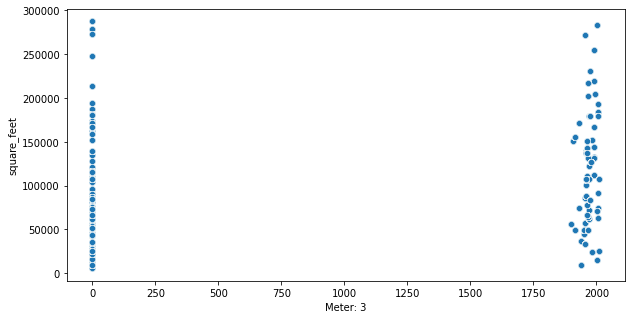

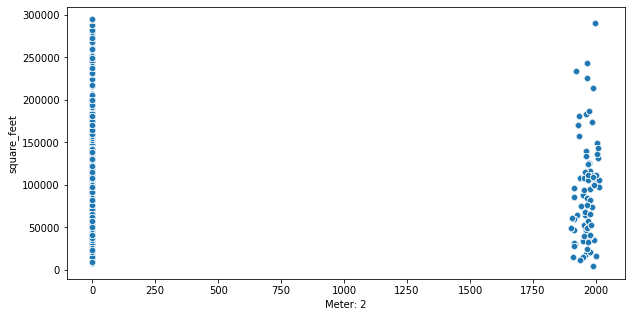

In [65]:
meter_arr = gden["meter"].unique()
for meter in meter_arr:
    mask = gden["meter"] == meter
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data = gden[mask], x = "year_built", y = "square_feet")
    plt.xlabel("Meter: {}".format(meter))
    plt.show()